In [17]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt

first we run the example code...

In [3]:
path_to_data_file = './Hera/'
uv = UVData()
uv.read(f'{path_to_data_file}/zen.2459122.34011.mini.sum.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1536, 1)


In [11]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
# Pick 2 sample antennas, and get data from that baseline. Note that to get the␣'auto-correlations', you can do the
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 23
data_apair = uv.get_data(antenna1,antenna2)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


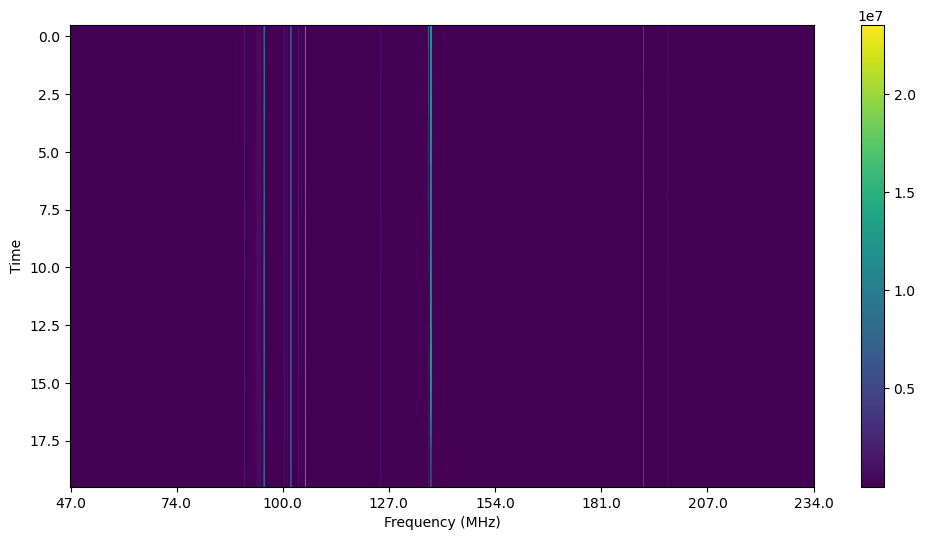

In [37]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data_apair),aspect='auto')
cbar = fig.colorbar(im)
# freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel,␣in MHz
# uv.freq_array seems to already be 1d, so I'll just remove the [0] to stop it from puking
freqs = uv.freq_array*1e-6 #gets frequencies associated with each channel,␣in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

to be honest, this waterfall looks a little inscrutable to me. It seems to just be showing high magnitude for a few key frequencies, but it's quite hard to see whether magnitude is particularly time dependent for those frequencies. perhaps attempting to plot in 3d would help?

## **Task 1: exploration**

#### **9.1:** how many antennas?

In [237]:
uv1, uv2, uv3 = UVData(),UVData(),UVData() 
uv1.read(f"{path_to_data_file}/zen.2459122.34011.mini.sum.uvh5")
uv2.read(f"{path_to_data_file}/zen.2459122.48015.mini.sum.uvh5")
uv3.read(f"{path_to_data_file}/zen.2459122.62018.mini.sum.uvh5")

we check number of antennas by using .antenna_numbers

In [296]:
for u in [uv1, uv2, uv3]:
    print(f'num antennas: {len(u.antenna_numbers)}')
print(uv1.antenna_numbers)

num antennas: 104
num antennas: 104
num antennas: 104
[130 135 110 129 142 123  66 143  50  82  83  98 127 128  88 180  73 144
 161 181 176 162  58 182  89 177 163 183  90 164  91 165 178 179 184  45
  81 185  46 186  59 116  44 109  93  75  94  92 155 107 108 145 156 157
 158 187 121   0   1  11  12  13  14   2  23  24  25  26  36  37  38  39
  51  52  53  67  68  84  85  86  87 124 166 141 111 112 120 122  65 136
 137 138 140  99 100 101 102 103 104 105 117 118 119 160]


ok, so each of the files has 104 antennas (which also appear to be the same)

#### **9.2:** how many antennas have visibilities associated?

In [246]:
print(len(np.unique(uv1.ant_1_array)))
print(len(uv1.get_ants()))

36
36


so 36 actually have visibilities associated with them.

#### **9.3:** number of baselines

$total\ baselines = (total\ pairings\ of\ different\ antennas) + (auto\ correlations\ count) =$
${36 \choose 2} + 36 = 36*35/2+36 = 666$

$times*baselines = 20*666 = 13320$ \
\
number of baselines multiplied by number of times of course gives us uv.data_array.shape[0], as our data polls every baseline at every time interval

#### **9.4**

In [471]:
#waterfall from example code
def waterfall(data):
    fig, axs = plt.subplots(1,1,figsize=(12,6))
    im = plt.imshow(np.abs(data),aspect='auto')
    cbar = fig.colorbar(im)
    freqs = uv1.freq_array*1e-6 #gets frequencies associated with each channel,␣in MHz
    axs.set_ylabel('Time')
    axs.set_xlabel('Frequency (MHz)')
    xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
    _ = axs.set_xticks(xticks)
    xticklabels = np.around(freqs[xticks],0)
    _ = axs.set_xticklabels(xticklabels)

#attempt at 3d waterfall
def waterfall3d(data):
    X, Y = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(X,Y,np.abs(data),cmap='viridis')
    freqs = uv1.freq_array*1e-6 #gets frequencies associated with each channel,␣in MHz
    ax.set_ylabel('Time')
    ax.set_xlabel('Frequency (MHz)')
    xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
    _ = ax.set_xticks(xticks)
    xticklabels = np.around(freqs[xticks],0)
    _ = ax.set_xticklabels(xticklabels)

we plot baseline(1,2) for the 20 time intervals

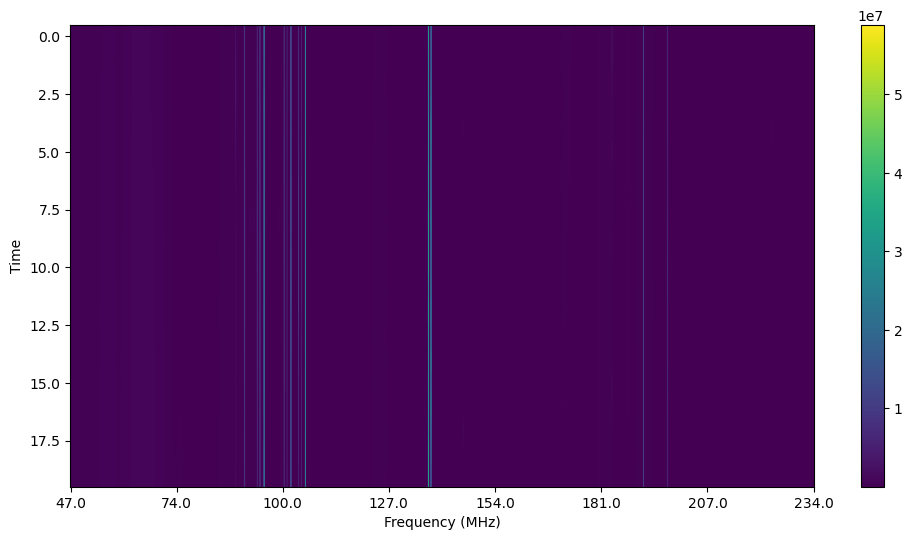

In [473]:
antenna1 = 1
antenna2 = 2
data_apair = uv1.get_data(antenna1,antenna2)
waterfall(data_apair)

it's still a bit hard to see time dependence here, so let's try plotting it in 3d

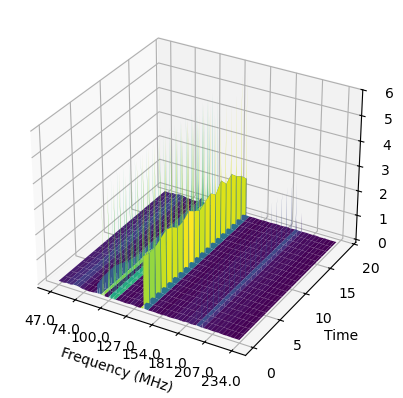

In [475]:
waterfall3d(data_apair)

this actually makes time dependence a little easier to see for certain frequencies, but it's quite an ugly visualization

#### **9.5** plot of baseline(1,2) for first time interval

Where for 9.5-9.8 I'm assuming "for the first time interval" means just grabbing the first row out of 20 from data for a particular baseline. Doesn't this turn into a graph with no time dependence though?

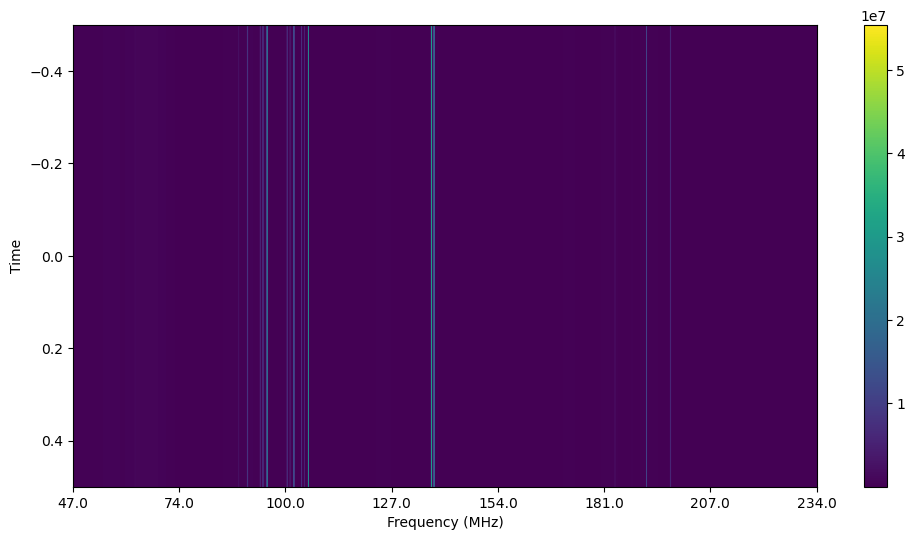

In [480]:
data_apair = [uv1.get_data(1,2)[0]]
waterfall(data_apair)

#### **9.6** plot of baseline(1,1) for first time interval

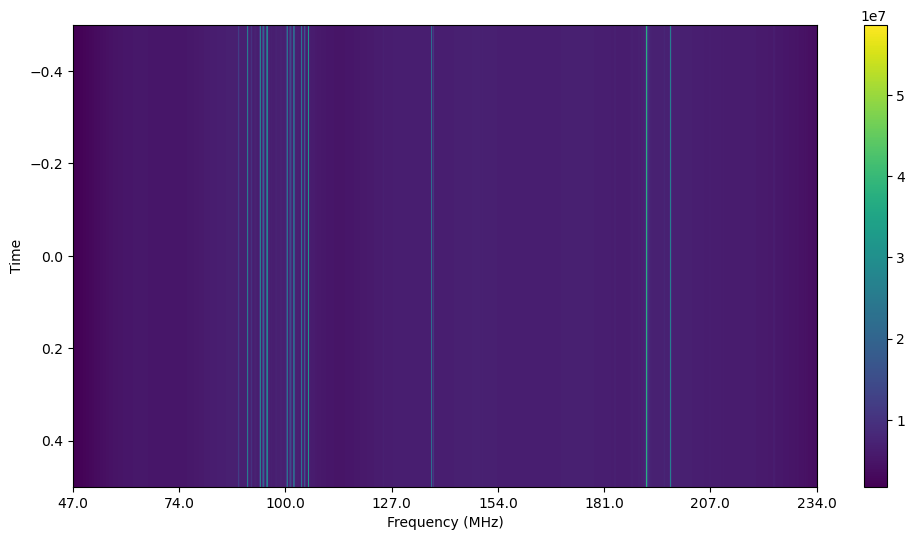

In [483]:
data_apair = [uv.get_data(1,1)[0]]
waterfall(data_apair)

#### **9.7** plot of average of non-auto-correlation pairs for first time interval

we accomplish this by averaging the plots of all non-auto-correlation pairs (by summing over all possible pairs and then removing dupes, then dividing by 36*35)

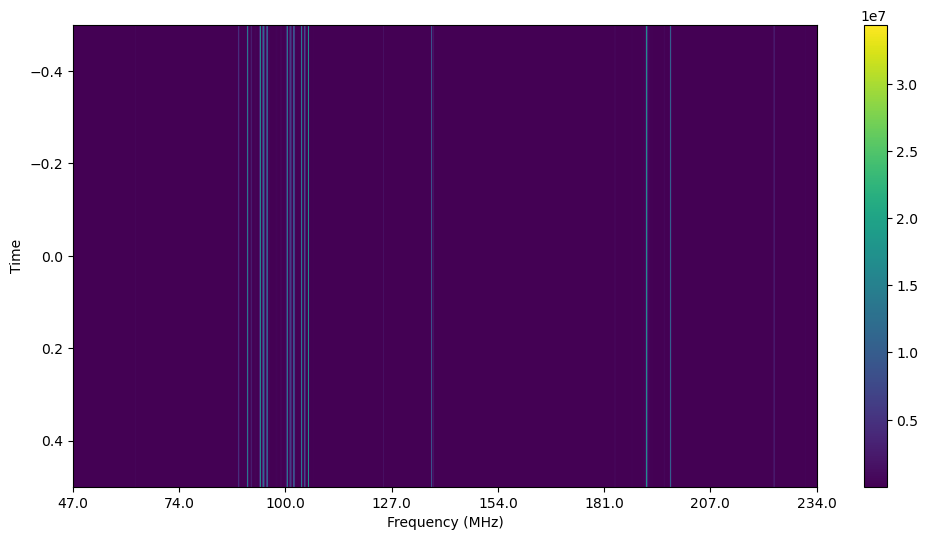

In [487]:
sum = np.zeros((20, 1536))
for i in uv1.get_ants():
    for j in uv1.get_ants():
        sum += np.abs(uv.get_data(i,j))
for i in uv1.get_ants():
    sum -= np.abs(uv.get_data(i,i))
sum /= (36*35)
waterfall([sum[0]])

#### **9.8**
average amplitude as a function of frequency is more or less a slice of our previous graph

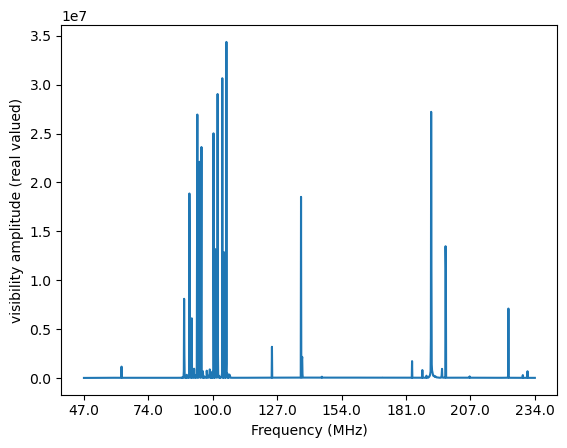

In [523]:
fig, ax = plt.subplots()
ax.plot(sum[0])
freqs = uv1.freq_array*1e-6 #gets frequencies associated with each channel,␣in MHz
ax.set_ylabel('visibility amplitude (real valued)')
ax.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = ax.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = ax.set_xticklabels(xticklabels)

the scale makes this a bit hard to read, so let's log-scale it

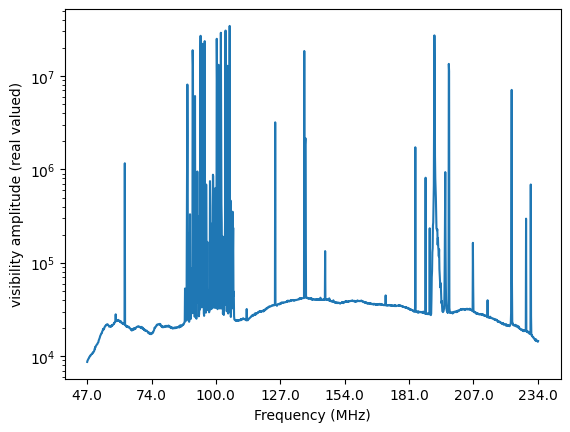

In [525]:
fig, ax = plt.subplots()
ax.plot(sum[0])
plt.yscale('log')
freqs = uv1.freq_array*1e-6 #gets frequencies associated with each channel,␣in MHz
ax.set_ylabel('visibility amplitude (real valued)')
ax.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = ax.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = ax.set_xticklabels(xticklabels)

## **Task 2: eliminate human sources of contamination**

choose a baseline: let's just use 1,2 again

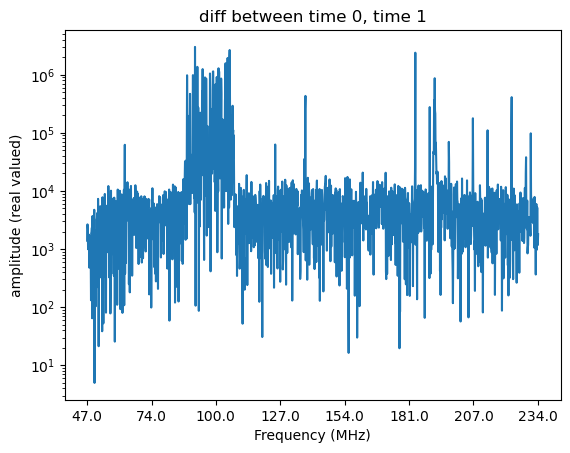

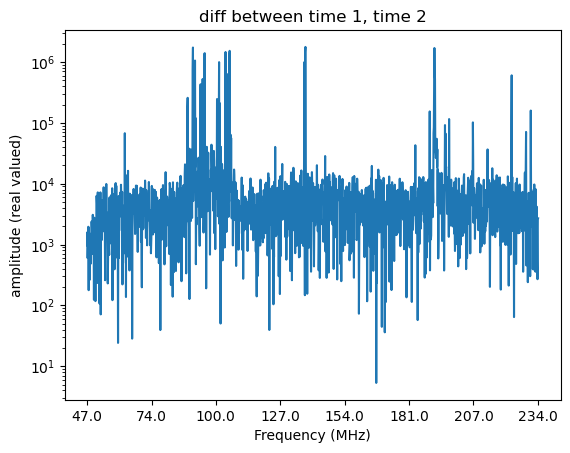

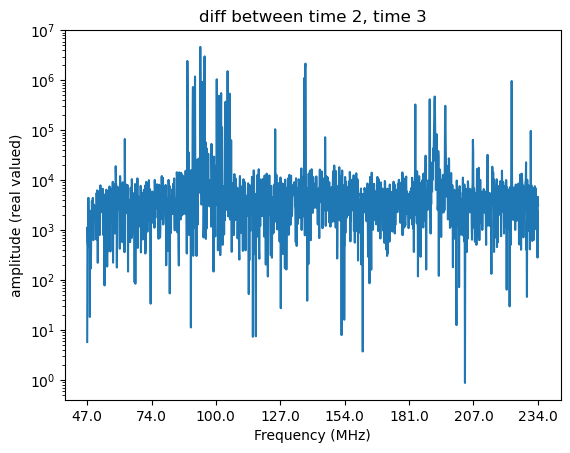

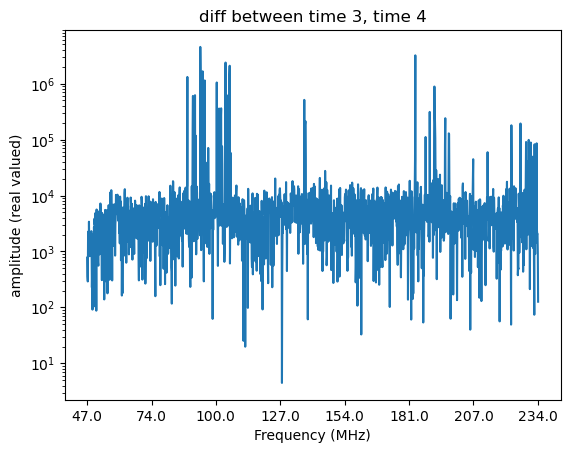

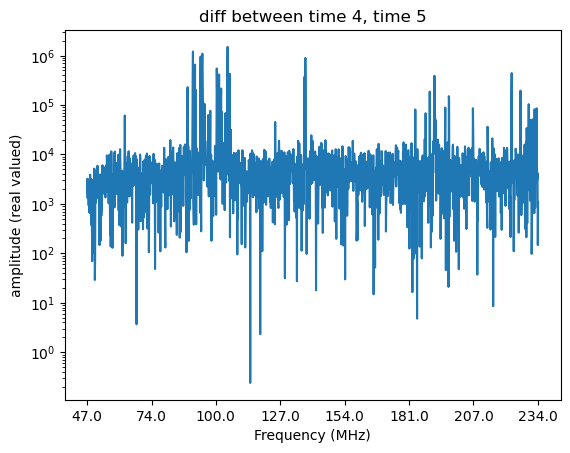

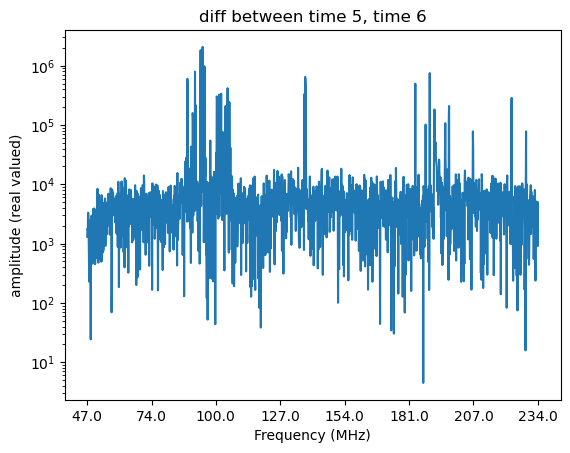

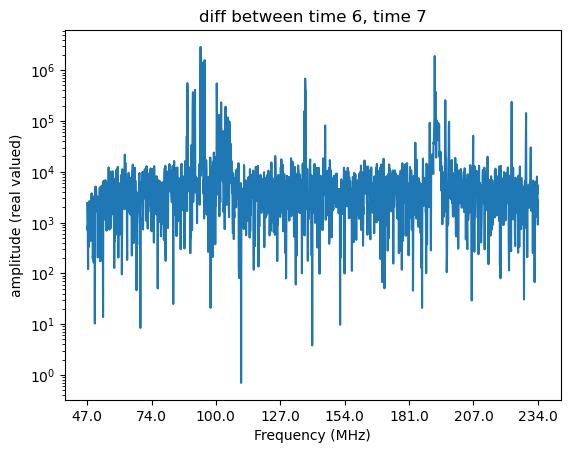

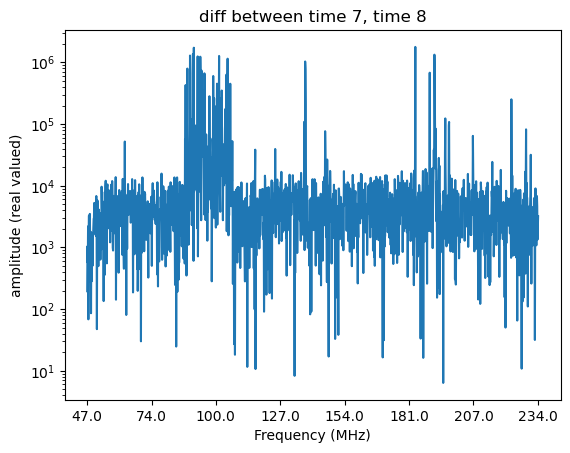

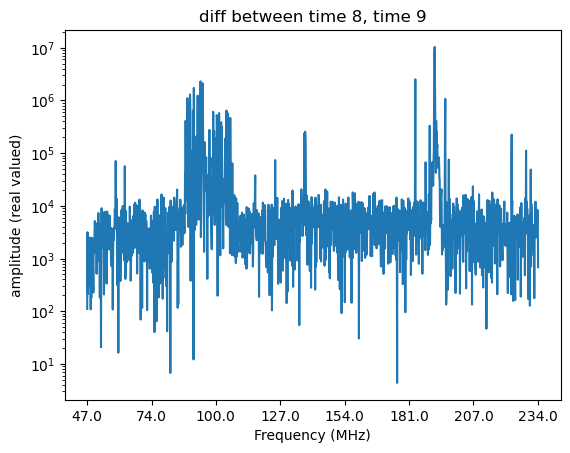

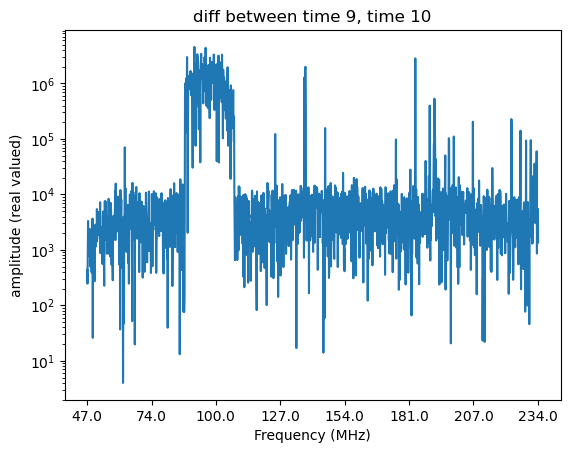

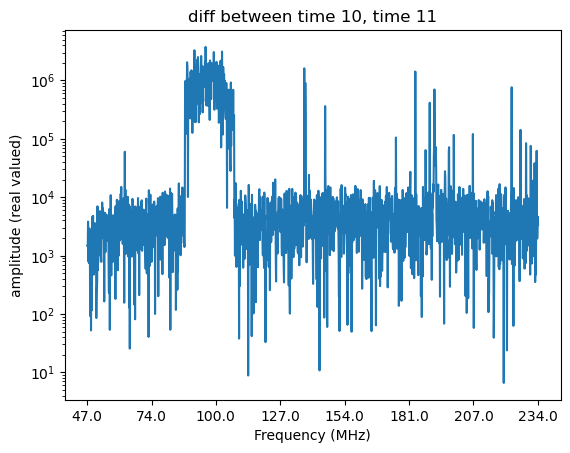

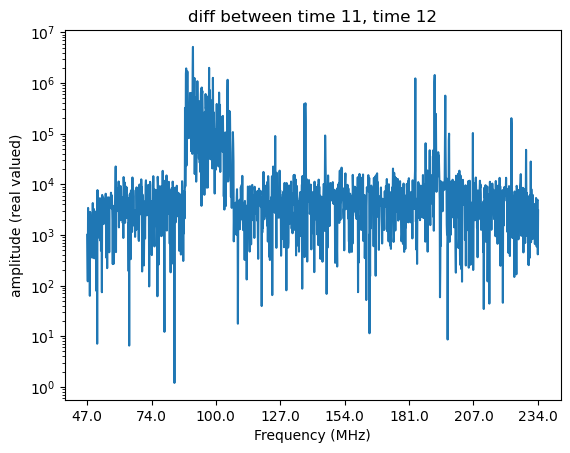

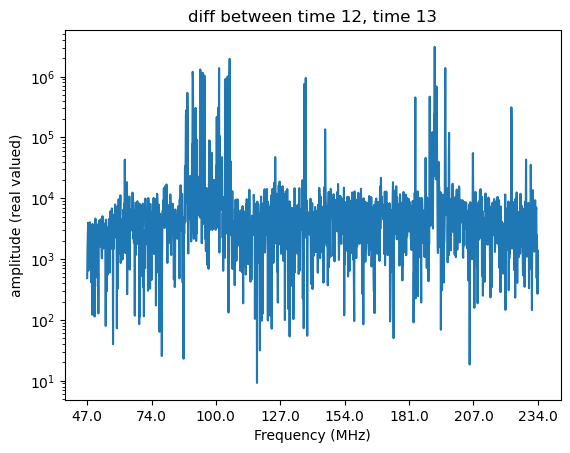

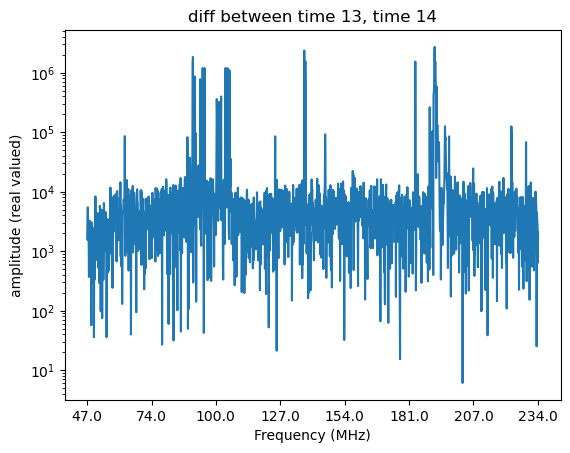

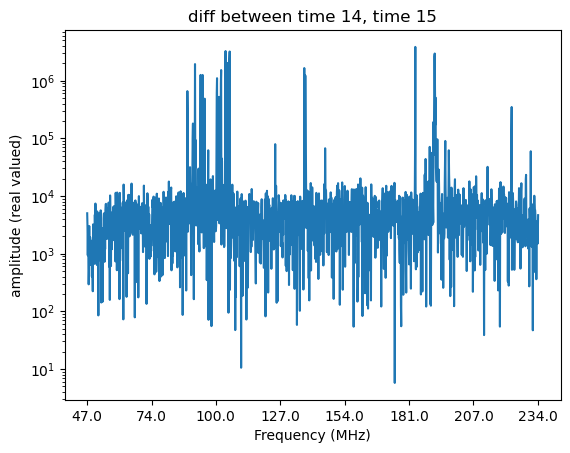

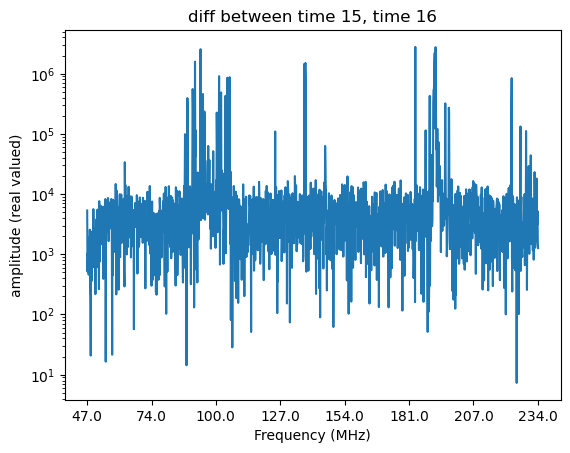

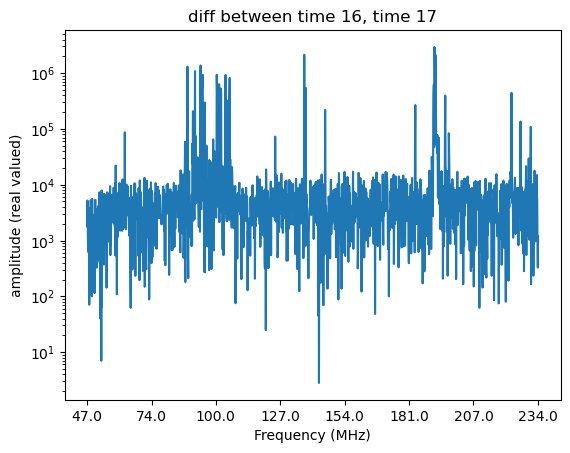

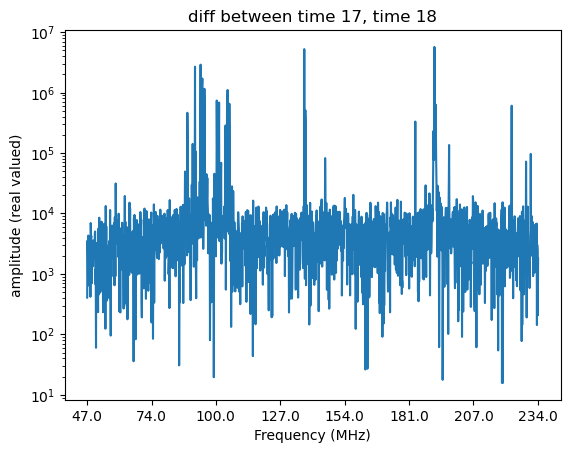

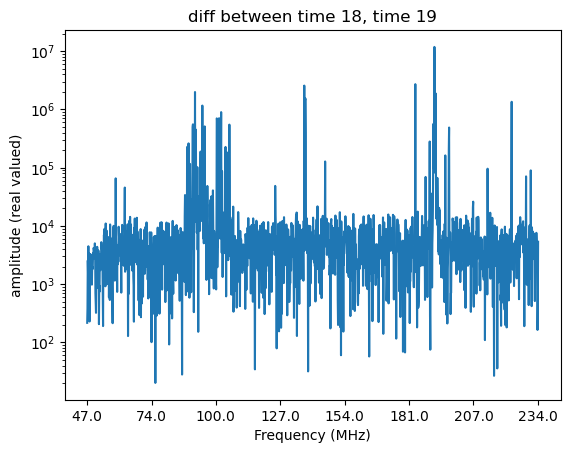

In [626]:
# graphs amplitude of difference in visibility between two time slices for baseline(i,j)
def amp_diff(t1, t2, i, j):
    fig, ax = plt.subplots()
    ax.plot(np.abs(np.abs(uv.get_data(i,j)[t1])-np.abs(uv.get_data(i,j)[t2])))
    plt.yscale('log')
    freqs = uv1.freq_array*1e-6 #gets frequencies associated with each channel,␣in MHz
    ax.set_ylabel('amplitude (real valued)')
    ax.set_xlabel('Frequency (MHz)')
    xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
    _ = ax.set_xticks(xticks)
    xticklabels = np.around(freqs[xticks],0)
    _ = ax.set_xticklabels(xticklabels)
    plt.title(f'diff between time {t1}, time {t2}')
    
i = 1
j = 2
for t in range(19):
    amp_diff(t, t+1, i, j)

eyeballing the diff plots leads us to guess we should set the threshold somewhere around 1e5. we can try varying it from 1e4 to 1e6

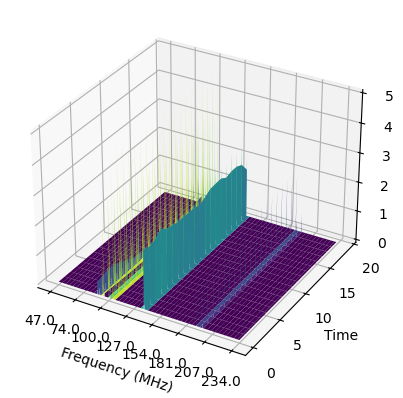

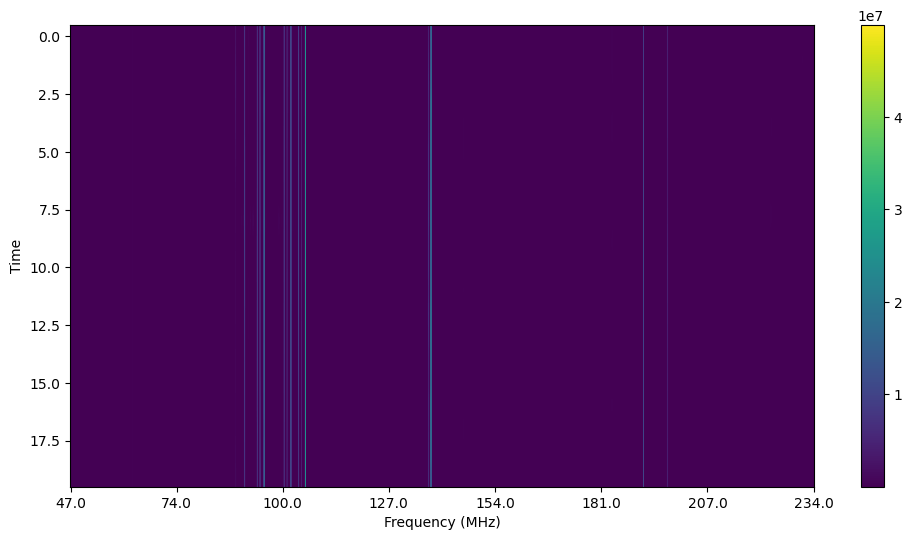

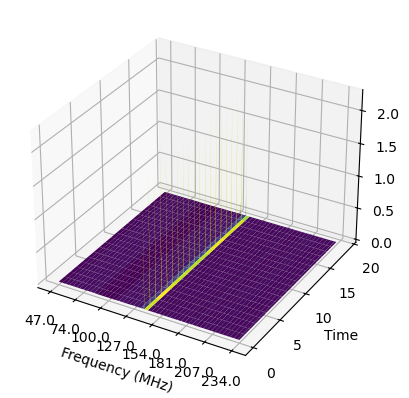

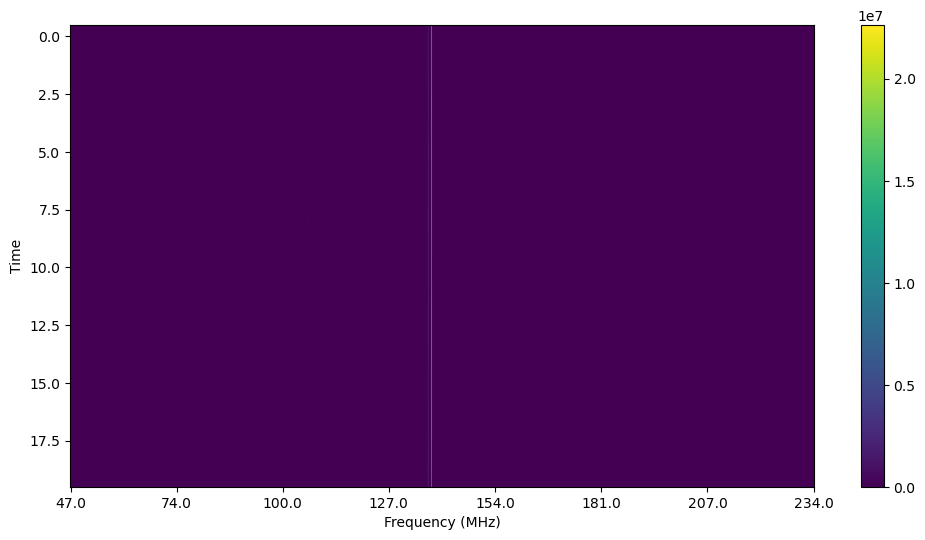

In [747]:
threshold = 1e5
bad_freqs = []
i, j = 2,140
for t in range(19):
    diff = np.abs(np.abs(uv.get_data(i,j)[t])-np.abs(uv.get_data(i,j)[t+1]))
    for k in range(len(freqs)):
        if diff[k] > threshold:
            bad_freqs.append(k)

data = np.abs(uv1.get_data(i,j))
waterfall3d(data)
waterfall(data)
for k in bad_freqs:
    data[:,k]=0
# for k in range(len(data[0])):
#     if k in bad_freqs:
#         for l in range(len(data)):
#             data[l][k] = 0
waterfall3d(data)
waterfall(data)

after filtering with that range of thresholds, most of the frequencies with high amplitude are wiped at some point in the range. for now we settle on 1e5, which filters out most frequencies except for a bump at about 135MHz

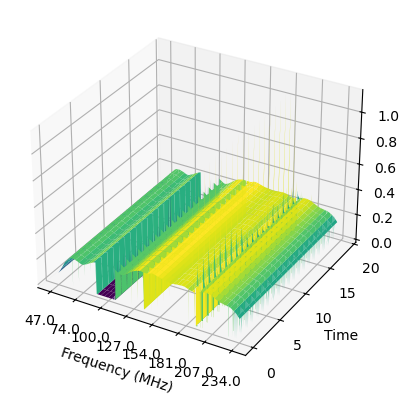

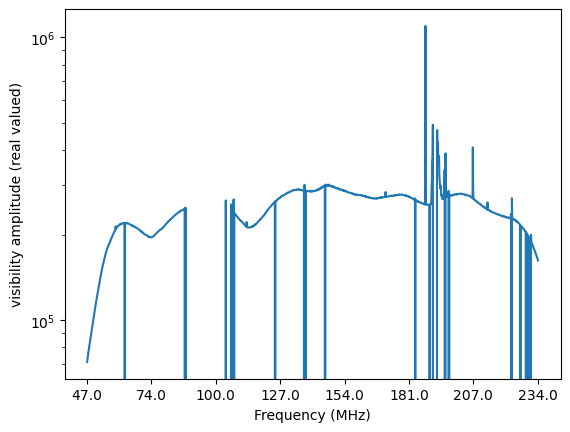

In [751]:
sum = np.zeros((20, 1536))
for i in uv1.get_ants():
    for j in uv1.get_ants():
        # if i != j:  
        if True:  
            temp = np.abs(uv.get_data(i,j))
            for k in bad_freqs:
                temp[:,k]=0
            sum += temp
sum /= (36*35)
waterfall3d(sum)

fig, ax = plt.subplots()
ax.plot(sum[0])
plt.yscale('log')
freqs = uv1.freq_array*1e-6 #gets frequencies associated with each channel,␣in MHz
ax.set_ylabel('visibility amplitude (real valued)')
ax.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = ax.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = ax.set_xticklabels(xticklabels)

most frequencies that had large amplitude earlier are removed after the filtering we just did. the only range that seems to have large amplitudes remaining is around 180-200MHz.

It's still not entirely clear to me how to identify signal vs noise. For some of the frequencies with high diff between time slices, the 3d plot appeared to show periodic oscillation. I'm assuming both signal and interference will look periodic in that fashion. Consulting the table of commonly used frequencies for broadcasting etc., the frequencies span almost the entire range we're looking at. by setting the threshold for diff between slices at various points between 1e4 and 1e6, we can selectively remove almost any of the peaky frequencies. What's determining the cutoff?